#Implement an XRay model from the industry
- So many AI experts have been building chast XRay models to predict Covid
- The objective is to use one such proven model on Covid and train for Pneumonia predictions
- Evaluated multipled models and identified a VGG model created by [pyimagesearch](https://)
- Load the model
- Load test and train
- Improve the by training all layers
- Check the results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import pickle as pk
import tensorflow

base_dir = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna"
test_dir = base_dir + "/stage_2_test_images"
train_dir =  base_dir + "/stage_2_train_images"
converted_imgs_dir = base_dir+"/convert_train_images1"
models_dir= base_dir+"/pck"
ext_models_dir = models_dir+"/external_models"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load Data
tr_x = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainX_n.npy"
tr_y = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainY_n.npy"
t_x = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testX_n.npy"
t_y = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testY_n.npy"


file = open(tr_x, 'rb')
trainX = np.load(file)
file.close()
print("Loaded",tr_x)

file = open(tr_y, 'rb')
trainY = np.load(file)
file.close()
print("Loaded",tr_y)

file = open(t_x, 'rb')
testX = np.load(file)
file.close()
print("Loaded",t_x)

file = open(t_y, 'rb')
testY = np.load(file)
file.close()
print("Loaded",t_y)


Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainX_n.npy
Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainY_n.npy
Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testX_n.npy
Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testY_n.npy


In [ ]:
#hyper params
INIT_LR = .001
EPOCHS = 10
BS = 32
opt = tensorflow.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
loss="sparse_categorical_crossentropy"
metrics=['accuracy']

In [ ]:
covid_model = tensorflow.keras.models.load_model("/content/drive/My Drive/CAPSTONE-PROJECT/rsna/pck/external_models/covid19.model")
covid_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in covid_model.layers:
	layer.trainable = False

covid_model.compile(loss=loss, optimizer=opt,metrics=metrics)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator() #rotation_range = 15, horizontal_flip = True)
generator = datagen.flow(trainX,trainY, batch_size=8,shuffle=True)

In [ ]:
covid_model.fit(trainX,trainY,epochs=EPOCHS,batch_size=BS,validation_data=(testX, testY))
'''
history = covid_model.fit_generator(
    generator=generator,
    epochs=2
)
'''

Epoch 1/10
300/300 [==============================] - 270s 899ms/step - loss: 10308937.0000 - accuracy: 0.6034 - val_loss: 0.5723 - val_accuracy: 0.6979
Epoch 2/10
300/300 [==============================] - 263s 877ms/step - loss: 0.5924 - accuracy: 0.7043 - val_loss: 0.5530 - val_accuracy: 0.7271
Epoch 3/10
300/300 [==============================] - 263s 876ms/step - loss: 0.5700 - accuracy: 0.7199 - val_loss: 0.5509 - val_accuracy: 0.7287
Epoch 4/10
300/300 [==============================] - 263s 876ms/step - loss: 0.5606 - accuracy: 0.7236 - val_loss: 0.5914 - val_accuracy: 0.7138
Epoch 5/10
300/300 [==============================] - 263s 877ms/step - loss: 0.5551 - accuracy: 0.7330 - val_loss: 0.5369 - val_accuracy: 0.7367
Epoch 6/10
300/300 [==============================] - 263s 876ms/step - loss: 0.5499 - accuracy: 0.7396 - val_loss: 0.5272 - val_accuracy: 0.7467
Epoch 7/10
300/300 [==============================] - 263s 876ms/step - loss: 0.5385 - accuracy: 0.7431 - val_loss: 0

'\nhistory = covid_model.fit_generator(\n    generator=generator,\n    epochs=2\n)\n'

In [ ]:
#from tensorflow.keras.models import load_model
filename = base_dir+"/"+"covid_model"
covid_model.save(filename)  # creates a HDF5 file 'my_model.h5'


In [ ]:
#covid_model = load_model('filename')

In [ ]:
from sklearn import metrics
y_predict = covid_model.predict(testX)
y_predict = np.argmax(y_predict, axis=1)

In [ ]:
print(metrics.classification_report(testY, y_predict, labels=[0, 1]))
cm=metrics.confusion_matrix(testY, y_predict, labels=[0, 1])
print("Confusion Matrics:")
cm

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1200
           1       0.75      0.74      0.74      1200

    accuracy                           0.75      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       0.75      0.75      0.75      2400

Confusion Matrics:


array([[902, 298],
       [312, 888]])

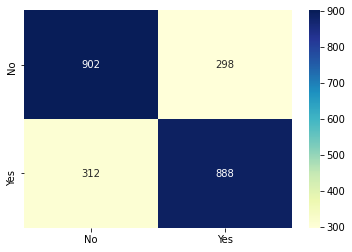

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g',cmap="YlGnBu")

#Summary
- The model performed well in both Test Vaidation and Train
- The model did not overfit - performed at uniform levels of accuracy for Train and Validation - Train Accuracy at 75.1% and Validation Accuracy at 74.5%
- False Negatives is 312/888 slightly to the higher side compared to other models
- The model performed better after making this learn in all layers
- sparse corss entropy worked much better as a loss function
- Presented the classification report and confusion matrix
